In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans



In [183]:
tweets = pd.read_csv('../data/twitter_api_pulls.csv')
twitter_handles = pd.read_csv('../data/twitter_handles.csv')

In [184]:
followers = pd.read_csv('../data/follower_count.csv')

In [188]:
dao = pd.read_json('../data/boardroom_dao.json', lines=True)
proposals = pd.read_json('../data/dao_proposals.json', lines=True)
tr_bal = pd.read_json('../data/dao_treasury_balance.json', lines=True)
tok_bal = pd.read_json('../data/dao_treasury_token_balance.json', lines=True)
tr_tran = pd.read_json('../data/dao_treasury_transactions.json', lines=True)
vote = pd.read_json('../data/vote.json', lines=True)

In [189]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'http[^ ]+','', i)
    temp.append(result)

tweets['tweets'] = temp

In [190]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'amp[^ ]+','', i)
    temp.append(result)

tweets['tweets'] = temp

In [191]:
tokenizer = RegexpTokenizer('\w+')

In [192]:
text_tokenized = [tokenizer.tokenize(i.lower())for i in tweets['tweets']]
tweets['tokenized_text'] = text_tokenized

In [193]:
tweets

,screen_name,tweets,likes,retweets,time,tokenized_text
0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv..."
1,1HiveOrg,RT @1HiveOrg: 1HTV is LIVE! 🐝 📺\n\nJoin us for...,0,4,2022-02-14 17:06:00+00:00,"[rt, 1hiveorg, 1htv, is, live, join, us, for, ..."
2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news..."
3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,..."
4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra..."
...,...,...,...,...,...,...
34804,MakerDao,MKR holders and those looking for more detail ...,16,1,2021-01-18 17:28:29+00:00,"[mkr, holders, and, those, looking, for, more,..."
34805,MakerDao,🚦Community Greenlight Polls Continued:\nWFIL (...,14,1,2021-01-18 17:28:26+00:00,"[community, greenlight, polls, continued, wfil..."
34806,MakerDao,🚦Community Greenlight Polls for possible colla...,21,2,2021-01-18 17:28:26+00:00,"[community, greenlight, polls, for, possible, ..."
34807,MakerDao,🔮Whitelist @Instadapp on ETHUSD Oracle (MIP10c...,8,0,2021-01-18 17:28:25+00:00,"[whitelist, instadapp, on, ethusd, oracle, mip..."


In [194]:
def join_vect(df, col):
    joined = []
    for i in df[f'{col}']:
        joined.append(" ". join(i))
    df[f'joined_{col}'] = joined
    return df

In [195]:
join_vect(tweets, 'tokenized_text')

,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text
0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv...",1htv s vegaypatino shares his perspective on f...
1,1HiveOrg,RT @1HiveOrg: 1HTV is LIVE! 🐝 📺\n\nJoin us for...,0,4,2022-02-14 17:06:00+00:00,"[rt, 1hiveorg, 1htv, is, live, join, us, for, ...",rt 1hiveorg 1htv is live join us for daospace ...
2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news...",1htv is live join us for daospace news a chat ...
3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,...",1htv monday stream tomorrow at 11am et daospac...
4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra...",2 hours left our gnosis auction is wrapping up...
...,...,...,...,...,...,...,...
34804,MakerDao,MKR holders and those looking for more detail ...,16,1,2021-01-18 17:28:29+00:00,"[mkr, holders, and, those, looking, for, more,...",mkr holders and those looking for more detail ...
34805,MakerDao,🚦Community Greenlight Polls Continued:\nWFIL (...,14,1,2021-01-18 17:28:26+00:00,"[community, greenlight, polls, continued, wfil...",community greenlight polls continued wfil wrap...
34806,MakerDao,🚦Community Greenlight Polls for possible colla...,21,2,2021-01-18 17:28:26+00:00,"[community, greenlight, polls, for, possible, ...",community greenlight polls for possible collat...
34807,MakerDao,🔮Whitelist @Instadapp on ETHUSD Oracle (MIP10c...,8,0,2021-01-18 17:28:25+00:00,"[whitelist, instadapp, on, ethusd, oracle, mip...",whitelist instadapp on ethusd oracle mip10c9 s...


In [196]:
cv = CountVectorizer(stop_words='english')

In [197]:
tweet_vect = cv.fit_transform(tweets['joined_tokenized_text'])
tweet_vect_tt = pd.DataFrame(tweet_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

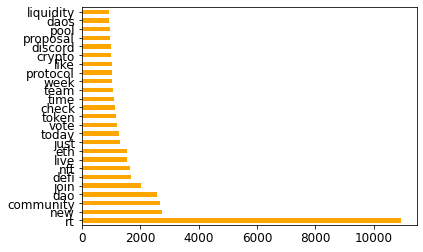

In [198]:
tweet_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [201]:
tweets

,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text
0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv...",1htv s vegaypatino shares his perspective on f...
1,1HiveOrg,RT @1HiveOrg: 1HTV is LIVE! 🐝 📺\n\nJoin us for...,0,4,2022-02-14 17:06:00+00:00,"[rt, 1hiveorg, 1htv, is, live, join, us, for, ...",rt 1hiveorg 1htv is live join us for daospace ...
2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news...",1htv is live join us for daospace news a chat ...
3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,...",1htv monday stream tomorrow at 11am et daospac...
4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra...",2 hours left our gnosis auction is wrapping up...
...,...,...,...,...,...,...,...
34804,MakerDao,MKR holders and those looking for more detail ...,16,1,2021-01-18 17:28:29+00:00,"[mkr, holders, and, those, looking, for, more,...",mkr holders and those looking for more detail ...
34805,MakerDao,🚦Community Greenlight Polls Continued:\nWFIL (...,14,1,2021-01-18 17:28:26+00:00,"[community, greenlight, polls, continued, wfil...",community greenlight polls continued wfil wrap...
34806,MakerDao,🚦Community Greenlight Polls for possible colla...,21,2,2021-01-18 17:28:26+00:00,"[community, greenlight, polls, for, possible, ...",community greenlight polls for possible collat...
34807,MakerDao,🔮Whitelist @Instadapp on ETHUSD Oracle (MIP10c...,8,0,2021-01-18 17:28:25+00:00,"[whitelist, instadapp, on, ethusd, oracle, mip...",whitelist instadapp on ethusd oracle mip10c9 s...


In [202]:
followers

,screen_name,follower_count
0,1HiveOrg,6665
1,1inch,1015150
2,1UP,62175
3,AaveAave,428464
4,aavegotchi,92203
...,...,...
190,iearnfinance,182864
191,yfBeta,1630
192,yup_io,6544
193,_alchemistcoin,27441


In [203]:
twitter_handles

,name,twitter_handle,twitter_url
0,1HiveLLC,1HiveOrg,https://twitter.com/1HiveOrg
1,1inch,1inch,https://twitter.com/1inch
2,1UP,1UP,https://twitter.com/1UP
3,Aave,AaveAave,https://twitter.com/AaveAave
4,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi
...,...,...,...
191,XDAO,xdaoapp,https://twitter.com/xdaoapp
192,Yam Finance,YamFinance,https://twitter.com/YamFinance
193,Yearn Finance,iearnfinance,https://twitter.com/iearnfinance
194,yfBeta,yfBeta,https://twitter.com/yfBeta


In [204]:
twitter_merge = pd.merge(twitter_handles, followers,  how='left', left_on='twitter_handle', right_on = 'screen_name')

In [205]:
twitter_merge.drop(columns = 'screen_name', inplace = True)

In [206]:
twitter_merge

,name,twitter_handle,twitter_url,follower_count
0,1HiveLLC,1HiveOrg,https://twitter.com/1HiveOrg,6665.0
1,1inch,1inch,https://twitter.com/1inch,1015150.0
2,1UP,1UP,https://twitter.com/1UP,62175.0
3,Aave,AaveAave,https://twitter.com/AaveAave,428464.0
4,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0
...,...,...,...,...
193,XDAO,xdaoapp,https://twitter.com/xdaoapp,6174.0
194,Yam Finance,YamFinance,https://twitter.com/YamFinance,25296.0
195,Yearn Finance,iearnfinance,https://twitter.com/iearnfinance,182864.0
196,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0


In [207]:
twitter_dao = pd.merge(twitter_merge, dao,  how='left', left_on='name', right_on = 'name')

In [208]:
twitter_dao_final = twitter_dao.dropna().reset_index()

In [209]:
twitter_dao_final.drop(columns = 'index', inplace=True)

In [210]:
twitter_dao_final.to_csv('../data/twitter_dao_final.csv', index=False)

In [218]:
twitter_dao_final

,name,twitter_handle,twitter_url,follower_count,cname,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type
0,1inch,1inch,https://twitter.com/1inch,1015150.0,1inch,['Protocol'],3.0,214.0,175.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO
1,Aave,AaveAave,https://twitter.com/AaveAave,428464.0,aave,['Protocol'],58.0,1790.0,890.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO
2,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0,aavegotchi,['Protocol'],246.0,77452.0,6512.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO
3,Ampleforth,AmpleforthOrg,https://twitter.com/AmpleforthOrg,36734.0,ampleforth,['Protocol'],0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ampl', 'net...",DAO
4,Armor,ArmorFi,https://twitter.com/ArmorFi,7958.0,armorfi,['Investment'],2.0,23.0,20.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'armor', 'ne...",DAO
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vesper,VesperFi,https://twitter.com/VesperFi,20023.0,vsp,['Uncategorized'],17.0,1212.0,470.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'vsp', 'netw...",DAO
59,Visor,VisorFinance,https://twitter.com/VisorFinance,169.0,visor,['Uncategorized'],0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'visr', 'net...",DAO
60,WGMI,wgmi4thepeople,https://twitter.com/wgmi4thepeople,4378.0,wgmi,['Uncategorized'],1.0,1.0,1.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO
61,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0,yfbeta,['Protocol'],14.0,708.0,324.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO


In [221]:
twitter_dao_final = pd.get_dummies(twitter_dao_final, columns = ['categories'])

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [232]:
twitter_dao_final.dtypes

name                             object
twitter_handle                   object
twitter_url                      object
follower_count                  float64
cname                            object
totalProposals                  float64
totalVotes                      float64
uniqueVoters                    float64
icons                            object
tokens                           object
type                             object
categories_['Investment']         uint8
categories_['Media']              uint8
categories_['Product']            uint8
categories_['Protocol']           uint8
categories_['Service']            uint8
categories_['Social']             uint8
categories_['Uncategorized']      uint8
dtype: object

In [234]:
numerics = ['float64', 'uint8']

newdf = twitter_dao_final.select_dtypes(include=numerics)


In [235]:
pca = PCA(n_components=2, random_state = 42)

sc = StandardScaler()

In [237]:
sc.fit(newdf)

StandardScaler()

In [239]:
features_sc = sc.transform(newdf)
pca.fit(features_sc)

features_pca = pca.transform(features_sc)

In [241]:
columns = [f'PCA_{i+1}' for i in pd.DataFrame(features_pca).columns]
features_df = pd.DataFrame(data = features_pca, columns=columns)

In [242]:
columns = [f'PCA_{i+1}' for i in pd.DataFrame(features_pca).columns]
features_df = pd.DataFrame(data = features_pca, columns=columns)

In [246]:
features_df = features_df.set_index(twitter_dao_final['name'])

In [247]:
features_df

,PCA_1,PCA_2
name,,
1inch,0.605159,3.016165
Aave,0.729944,1.582701
Aavegotchi,7.512074,-2.217368
Ampleforth,-0.417700,1.139292
Armor,-1.725209,-0.596107
...,...,...
Vesper,-1.537666,-1.207410
Visor,-1.896969,-1.091181
WGMI,-1.886468,-1.084832


In [248]:
X1 = features_df.copy()

sc = StandardScaler()

X1_sc = sc.fit_transform(X1)

In [268]:
k = 3
km = KMeans(n_clusters=k, random_state=42)
km.fit(X1_sc)

KMeans(n_clusters=3, random_state=42)

In [269]:
km.cluster_centers_

array([[ 2.0095094 , -1.39237464],
       [-0.84964197, -0.9049628 ],
       [ 0.1078833 ,  0.82145261]])

In [270]:
km.labels_

array([2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1],
      dtype=int32)

In [271]:
pred = km.predict(X1_sc)

In [272]:
features_df['cluster'] = km.labels_

In [273]:
features_df.head()

,PCA_1,PCA_2,cluster,color
name,,,,
1inch,0.605159,3.016165,2,blue
Aave,0.729944,1.582701,2,blue
Aavegotchi,7.512074,-2.217368,0,blue
Ampleforth,-0.417700,1.139292,2,blue
Armor,-1.725209,-0.596107,1,green


In [274]:
from sklearn.metrics import silhouette_score

In [275]:
silhouette_score(X1_sc, km.labels_)

0.6974345086368762

In [276]:
centroids = pd.DataFrame(
sc.inverse_transform(km.cluster_centers_),
columns = ['PCA_1', 'PCA_2'])

centroids

,PCA_1,PCA_2
0,3.107657,-1.848356
1,-1.313951,-1.201324
2,0.166839,1.090466


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

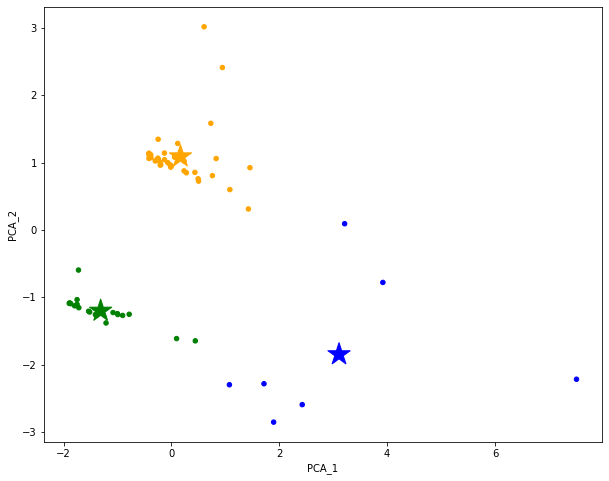

In [278]:
color_map = {0:"blue", 1:"green", 2:'orange'}
features_df['color'] = features_df['cluster'].map(color_map)

ax = features_df.plot(    
    kind="scatter", 
    x="PCA_1",
    y="PCA_2",
    figsize=(10,8),
    c = 'color'
)

centroids.plot(
    kind="scatter", 
    x="PCA_1",
    y="PCA_2", 
    marker="*",
    c=centroids.index.map(color_map),
    s=550,
    ax=ax
)

In [284]:
features_df

,PCA_1,PCA_2,cluster,color
name,,,,
1inch,0.605159,3.016165,2,orange
Aave,0.729944,1.582701,2,orange
Aavegotchi,7.512074,-2.217368,0,blue
Ampleforth,-0.417700,1.139292,2,orange
Armor,-1.725209,-0.596107,1,green
...,...,...,...,...
Vesper,-1.537666,-1.207410,1,green
Visor,-1.896969,-1.091181,1,green
WGMI,-1.886468,-1.084832,1,green


In [286]:
twitter_dao_final

,name,twitter_handle,twitter_url,follower_count,cname,totalProposals,totalVotes,uniqueVoters,icons,tokens,type,categories_['Investment'],categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized']
0,1inch,1inch,https://twitter.com/1inch,1015150.0,1inch,3.0,214.0,175.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO,0,0,0,1,0,0,0
1,Aave,AaveAave,https://twitter.com/AaveAave,428464.0,aave,58.0,1790.0,890.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO,0,0,0,1,0,0,0
2,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0,aavegotchi,246.0,77452.0,6512.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO,0,0,0,1,0,0,0
3,Ampleforth,AmpleforthOrg,https://twitter.com/AmpleforthOrg,36734.0,ampleforth,0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ampl', 'net...",DAO,0,0,0,1,0,0,0
4,Armor,ArmorFi,https://twitter.com/ArmorFi,7958.0,armorfi,2.0,23.0,20.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'armor', 'ne...",DAO,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vesper,VesperFi,https://twitter.com/VesperFi,20023.0,vsp,17.0,1212.0,470.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'vsp', 'netw...",DAO,0,0,0,0,0,0,1
59,Visor,VisorFinance,https://twitter.com/VisorFinance,169.0,visor,0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'visr', 'net...",DAO,0,0,0,0,0,0,1
60,WGMI,wgmi4thepeople,https://twitter.com/wgmi4thepeople,4378.0,wgmi,1.0,1.0,1.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO,0,0,0,0,0,0,1
61,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0,yfbeta,14.0,708.0,324.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO,0,0,0,1,0,0,0
